# Image filtering in spatial domain

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img=cv2.imread(r"C:\Users\hp\Downloads\cr7.jpg",0)

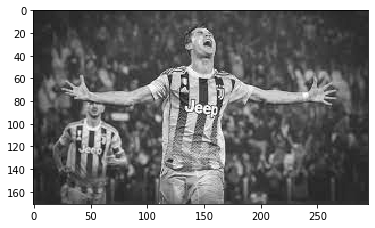

In [3]:
plt.imshow(img,cmap="gray")
plt.show()

In [4]:
img.shape

(171, 295)

In [5]:
def neighborhood_average(image,kernel_shape):
    kernel=(1/kernel_shape**2)*np.ones((kernel_shape,kernel_shape))
    r,c=image.shape
    new_img=np.zeros((r-kernel_shape+1,c-kernel_shape+1))
    for i in range(r-kernel_shape+1):
        for j in range(c-kernel_shape+1):
            new_img[i][j]=sum(sum(np.multiply(img[i:i+kernel_shape,j:j+kernel_shape],kernel)))
    return new_img

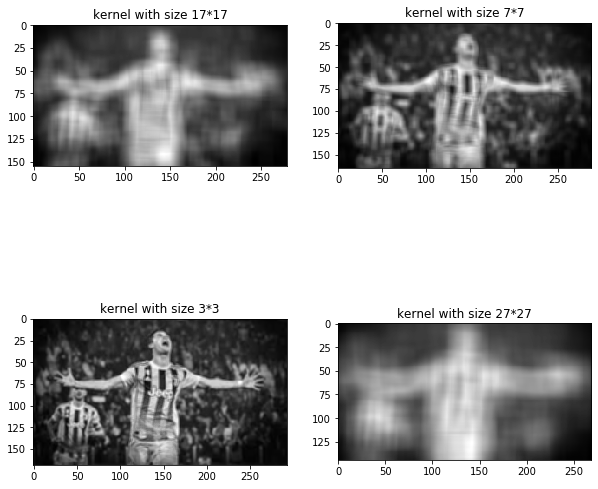

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title("kernel with size 17*17")
plt.imshow(neighborhood_average(img,17),cmap="gray")
plt.subplot(222)
plt.title("kernel with size 7*7")
plt.imshow(neighborhood_average(img,7),cmap="gray")
plt.subplot(223)
plt.title("kernel with size 3*3")
plt.imshow(neighborhood_average(img,3),cmap="gray")
plt.subplot(224)
plt.title("kernel with size 27*27")
plt.imshow(neighborhood_average(img,27),cmap="gray")
plt.show()

In [7]:
def spatial_correlation(image,kernel):
    kernel_shape=kernel.shape
    r,c=image.shape
    new_img=np.zeros((r-kernel_shape[0]+1,c-kernel_shape[1]+1))
    for i in range(r-kernel_shape[0]+1):
        for j in range(c-kernel_shape[1]+1):
            new_img[i][j]=sum(sum(np.multiply(img[i:i+kernel_shape[0],j:j+kernel_shape[1]],kernel)))
    return new_img

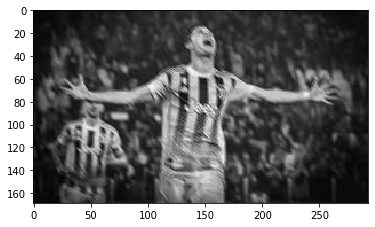

In [8]:
plt.imshow(spatial_correlation(img,np.array([[1,0,0],[0,1,0],[0,0,1]])),cmap="gray")

In [27]:
def padding(image,kernel_shape):
    # Make sure padding dimensions are odd numbers like 5*3
    image_shape=image.shape
    for i in range(int((kernel_shape[1]-1)//2)):
        image_shape=image.shape
        image=np.insert(image,0,np.zeros(image_shape[0]),axis=1)
        image=np.insert(image,image_shape[1]+1,np.zeros(image_shape[0]),axis=1)
    for i in range(int((kernel_shape[0]-1)//2)):
        image_shape=image.shape
        image=np.insert(image,0,np.zeros(image_shape[1]),axis=0)
        image=np.insert(image,image_shape[0]+1,np.zeros(image_shape[1]),axis=0)
    return image

In [28]:
padding(img,(5,5))

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0, 41, ..., 40,  0,  0],
       ...,
       [ 0,  0, 56, ..., 46,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [29]:
img.shape

(171, 295)

In [30]:
def spatial_correlation_with_padding(image,kernel):
    kernel_shape=kernel.shape
    r,c=image.shape
    image=padding(image,kernel_shape)
    new_img=np.zeros((r,c))
    for i in range(r-kernel_shape[0]):
        for j in range(c-kernel_shape[1]):
            new_img[i][j]=sum(sum(np.multiply(img[i:i+kernel_shape[0],j:j+kernel_shape[1]],kernel)))
    return new_img

In [31]:
kernel=np.random.rand(5,5)

In [14]:
kernel;

In [15]:
new_image=spatial_correlation_with_padding(img,np.eye(3,3))

In [16]:
new_image.shape

(171, 295)

In [17]:
img.shape

(171, 295)

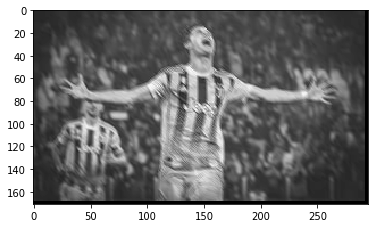

In [18]:
plt.imshow(new_image,cmap="gray")

In [19]:
def spatial_convolution_with_padding(image,kernel):
    kernel=np.transpose(kernel)
    kernel_shape=kernel.shape
    r,c=image.shape
    image=padding(image,kernel_shape)
    new_img=np.zeros((r,c))
    for i in range(r-kernel_shape[0]):
        for j in range(c-kernel_shape[1]):
            new_img[i][j]=sum(sum(np.multiply(img[i:i+kernel_shape[0],j:j+kernel_shape[1]],kernel)))
    return new_img

In [20]:
new_image1=spatial_convolution_with_padding(img,np.eye(3,3))

In [21]:
new_image1.shape

(171, 295)

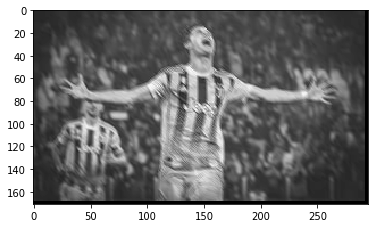

In [22]:
plt.imshow(new_image1,cmap="gray")